In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.color import rgb2gray, gray2rgb
import skimage

Grauwertkeil auslesen, slicen und anzeigen

480 640


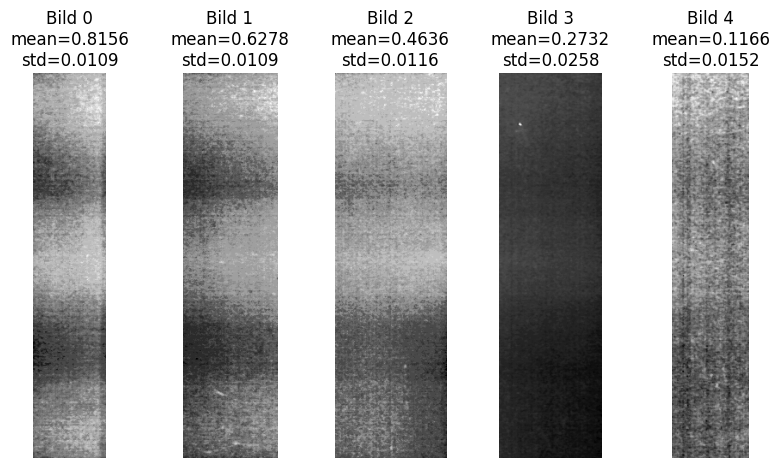

In [4]:
def readGrayImg(path):
    return rgb2gray(cv2.imread(path))

def saveGrayImg(path, img):
    cv2.imwrite(path, gray2rgb(img))

def readGrayScales(img):
    print(len(img), len(img[0]))
    white = img[0:450,   0:85]
    gray1 = img[0:450, 110:220]
    gray2 = img[0:450, 250:380]
    gray3 = img[0:450, 400:520]
    black = img[0:450, 540:630]
    return (white, gray1, gray2, gray3, black)

def plotGrayscale(val, title=""):
    plt.imshow(val, cmap=plt.cm.gray)
    plt.title(title)
    plt.axis('off')

grauwertkeil = readGrayImg("./grau/Grauwertkeil.png")
vals = readGrayScales(grauwertkeil)

plt.figure(figsize=(10, 5))
for i, val in enumerate(vals):
    plt.subplot(1, 5, i+1)
    plotGrayscale(val, f"Bild {i}\nmean={np.mean(val):.4f}\nstd={np.std(val):.4f}")

plt.show()

10 Schwarzbilder aufnehmen, kontrastmaximieren und anzeigen

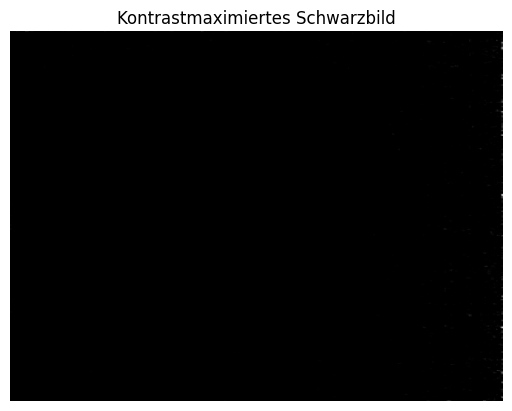

In [7]:
def img_avrg(images):
    return np.mean(images, axis=0)

dark_images = []
for i in range(10):
    dark_images.append(readGrayImg(f"./schwarz/dark{i}.png"))

dark_img = img_avrg(dark_images)
saveGrayImg("./ergebnis/dark_avrg.png", dark_img)

# Kontrastmaximiert
dark_img_adj = skimage.exposure.rescale_intensity(dark_img)
plotGrayscale(dark_img_adj, "Kontrastmaximiertes Schwarzbild")

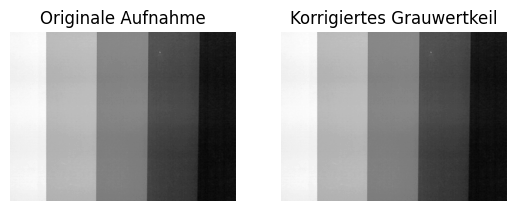

In [8]:
def subtract_darkimg(image):
	return np.subtract(image, dark_img)

grauwerte_sub = subtract_darkimg(grauwertkeil)
plt.subplot(1, 2, 1)
plotGrayscale(grauwertkeil, "Originale Aufnahme")
plt.subplot(1, 2, 2)
plotGrayscale(grauwerte_sub, "Korrigiertes Grauwertkeil")
plt.show()
saveGrayImg("./ergebnis/Grauwertkeil_sub.png", grauwerte_sub)

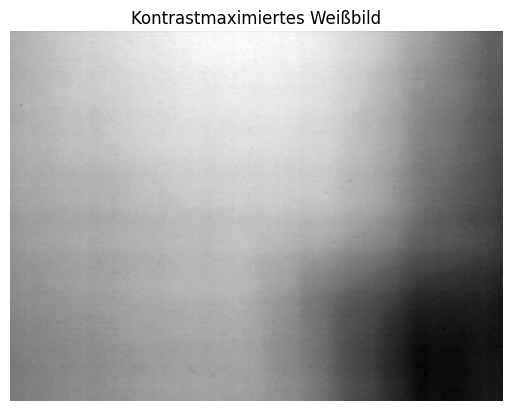

In [9]:
white_images = []
for i in range(10):
    white_images.append(readGrayImg(f"./weiss/white{i}.png"))

white_img = img_avrg(white_images)
plotGrayscale(white_img)
saveGrayImg("./ergebnis/white_avrg.png", white_img)

# Kontrastmaximiert
white_img_adj = skimage.exposure.rescale_intensity(white_img)
plotGrayscale(white_img_adj, "Kontrastmaximiertes Weißbild")

Weißbild normalisieren 

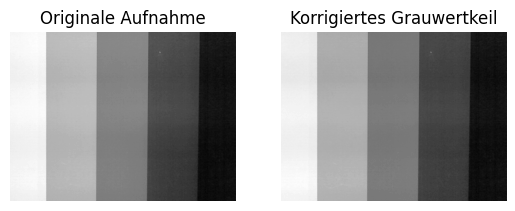

In [11]:
def normal(image):
	white_img_normal = white_img * 1.0 / np.mean(white_img)
	white_img_corrected = subtract_darkimg(image) / white_img_normal
	return white_img_corrected

grauwerte_norm = normal(grauwertkeil)

plt.subplot(1, 2, 1)
plotGrayscale(grauwertkeil, "Originale Aufnahme")
plt.subplot(1, 2, 2)
plotGrayscale(grauwerte_norm, "Korrigiertes Grauwertkeil")
plt.show()
saveGrayImg("./ergebnis/Grauwertkeil_norm.png", grauwerte_norm)

### Stuckpixel und Hotpixel

In [12]:
def findDeadPixels():
	black = np.min(dark_img)
	print(f"Dunkelster Schwarzwert: {black}")

	for a in white_img:
		for b in a:
			if b == black:
				print(f"Deadpixel bei {b}")
				return
	print("Keine Deadpixels gefunden.")

findDeadPixels()

def findStuckPixels():
	white = np.max(white_img)
	print(f"Hellster Weißwert: {white}")

	for a in dark_img:
		for b in a:
			if b == white:
				print(f"Stuckpixel bei {b}")
				return
	print("Keine Deadpixels gefunden.")

findStuckPixels()

Dunkelster Schwarzwert: 0.0
Keine Deadpixels gefunden.
Hellster Weißwert: 0.7606949411764705
Keine Deadpixels gefunden.


480 640


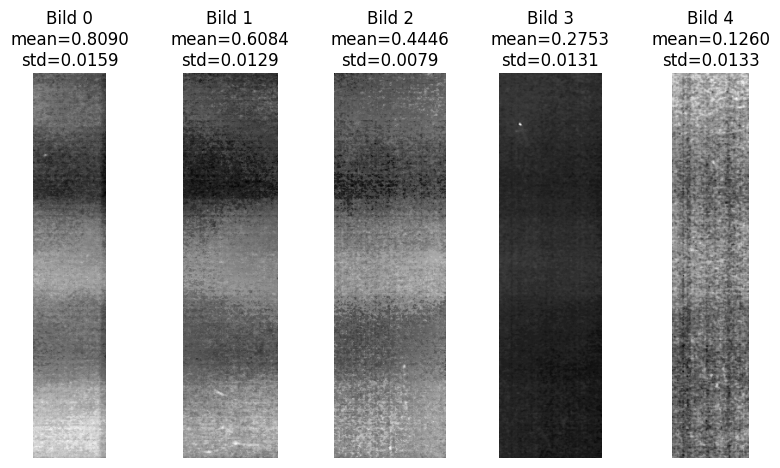

In [13]:
vals_norm = readGrayScales(grauwerte_norm)

plt.figure(figsize=(10, 5))
for i, val in enumerate(vals_norm):
    plt.subplot(1, 5, i+1)
    plotGrayscale(val, f"Bild {i}\nmean={np.mean(val):.4f}\nstd={np.std(val):.4f}")